In [15]:
import sqlite3
import pandas as pd

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn

conn = create_connection('''/Users/paxton615/Downloads/
                         SQL Course Materials/create-db-store.sql''')


In [19]:
from numpy import genfromtxt

In [39]:
sqlite_db = 'test_db.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

In [48]:
c.execute('DROP TABLE products')
# c.execute('DROP TABLE houses_pandas')
conn.commit()

In [49]:
c.execute('CREATE TABLE products (field1 INTEGER PRIMARY KEY,field2 INT, stock INTEGER, unit_price VARCHAR(40));')
conn.commit()

In [35]:
data = (genfromtxt('/Users/paxton615/Desktop/products.csv', delimiter = ',', skip_header = 1).tolist())

In [36]:
data

[[1.0, 70.0, 1.21],
 [2.0, 49.0, 4.65],
 [3.0, 38.0, 3.35],
 [4.0, 90.0, 4.53],
 [5.0, 94.0, 1.63],
 [6.0, 14.0, 2.39],
 [7.0, 98.0, 3.29],
 [8.0, 26.0, 0.74],
 [9.0, 67.0, 2.26],
 [10.0, 6.0, 1.09]]

In [37]:
for d in data:
    d.insert(0,None)

In [38]:
data

[[None, 1.0, 70.0, 1.21],
 [None, 2.0, 49.0, 4.65],
 [None, 3.0, 38.0, 3.35],
 [None, 4.0, 90.0, 4.53],
 [None, 5.0, 94.0, 1.63],
 [None, 6.0, 14.0, 2.39],
 [None, 7.0, 98.0, 3.29],
 [None, 8.0, 26.0, 0.74],
 [None, 9.0, 67.0, 2.26],
 [None, 10.0, 6.0, 1.09]]

In [50]:
for d in data:
    c.execute('''INSERT INTO products VALUES(?,?,?,?)''',d)
conn.commit()

In [52]:
products = c.execute('SELECT * FROM products').fetchall()

In [55]:
pp = pd.DataFrame(products, columns=['no.','index','sqm','price']).drop('no.',axis=1)

In [56]:
pp.index=pp['index']

In [60]:
pp.drop('index',axis=1, inplace=True)

In [82]:
pp

,sqm,price
index,,
1,70,1.21
2,49,4.65
3,38,3.35
4,90,4.53
5,94,1.63
6,14,2.39
7,98,3.29
8,26,0.74
9,67,2.26


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
pp['price']=pp.price.astype('float')

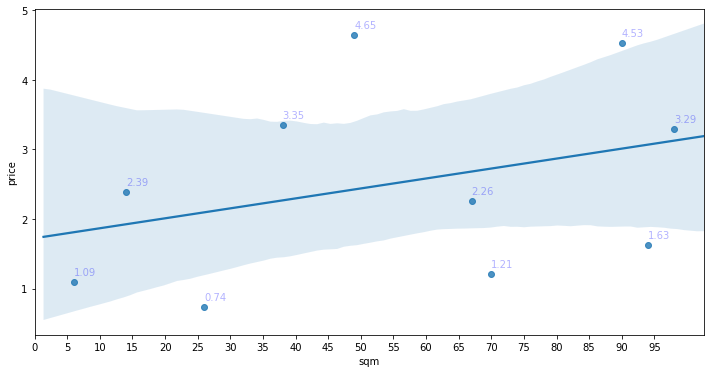

In [129]:
fig,ax=plt.subplots(figsize=(12,6))
ax = sns.regplot('sqm','price', data=pp)
ax1 = [ax.text(p[0], p[1]+0.1,p[1], color='blue',alpha = 0.3) for p in zip(pp['sqm'], pp['price'])]
ax.set_xticks(range(0,100,5))
# ax2 = ax.arrow(49, 4.6, 50, 10, width =2, shape='right', overhang = 3,color='y')
plt.show()

In [76]:
[ax.text(p[0], p[1]+50, p[1], color='g') for p in zip(ax.get_xticks(), pp['price'])]

[Text(0.0, 51.21, '1.21'),
 Text(20.0, 54.65, '4.65'),
 Text(40.0, 53.35, '3.35'),
 Text(60.0, 54.53, '4.53'),
 Text(80.0, 51.63, '1.63'),
 Text(100.0, 52.39, '2.39'),
 Text(120.0, 53.29, '3.29')]

In [ ]:
c.execute('CREATE TABLE houses (field1 INTEGER PRIMARY KEY, sqft INTEGER, bdrms INTEGER, age INTEGER, price INTEGER);')

In [ ]:
#  from csv to sql , methology 2

In [ ]:
sqlite_db = 'test_db.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

In [ ]:
data = pd.read_csv('./datasets/housing-data.csv')
data.head()

In [ ]:
data.to_sql('houses_pandas',             # Name of the table.
            con=conn,                    # The handle to the file that is set up.
            if_exists='replace',         # Overwrite, append, or fail.
            index=False)                 # Add index as column.

In [ ]:
df = pd.read_sql('SELECT * FROM houses_pandas LIMIT 10', con=conn)
df

In [ ]:
sqlite_db = 'test_db.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

In [139]:
product = pd.read_csv('/Users/paxton615/Desktop/products_2.csv')
product

,product_id,name,quantity_in_stock,unit_price
0,1,Foam Dinner Plate,70,1.21
1,2,"Pork - Bacon,back Peameal",49,4.65
2,3,"Lettuce - Romaine, Heart",38,3.35
3,4,"Brocolinni - Gaylan, Chinese",90,4.53
4,5,Sauce - Ranch Dressing,94,1.63
5,6,Petit Baguette,14,2.39
6,7,Sweet Pea Sprouts,98,3.29
7,8,Island Oasis - Raspberry,26,0.74
8,9,Longan,67,2.26
9,10,Broom - Push,6,1.09


In [140]:
product.to_sql('products_2', con=conn, index=False)

In [141]:
db = pd.read_sql('SELECT * FROM products_2', con=conn)
db

,product_id,name,quantity_in_stock,unit_price
0,1,Foam Dinner Plate,70,1.21
1,2,"Pork - Bacon,back Peameal",49,4.65
2,3,"Lettuce - Romaine, Heart",38,3.35
3,4,"Brocolinni - Gaylan, Chinese",90,4.53
4,5,Sauce - Ranch Dressing,94,1.63
5,6,Petit Baguette,14,2.39
6,7,Sweet Pea Sprouts,98,3.29
7,8,Island Oasis - Raspberry,26,0.74
8,9,Longan,67,2.26
9,10,Broom - Push,6,1.09


In [142]:
c.execute('SELECT * FROM products').fetchall()

[(1, 1, 70, '1.21'),
 (2, 2, 49, '4.65'),
 (3, 3, 38, '3.35'),
 (4, 4, 90, '4.53'),
 (5, 5, 94, '1.63'),
 (6, 6, 14, '2.39'),
 (7, 7, 98, '3.29'),
 (8, 8, 26, '0.74'),
 (9, 9, 67, '2.26'),
 (10, 10, 6, '1.09')]

In [143]:
c.execute('SELECT * FROM products_2').fetchall()

[(1, 'Foam Dinner Plate', 70, 1.21),
 (2, 'Pork - Bacon,back Peameal', 49, 4.65),
 (3, 'Lettuce - Romaine, Heart', 38, 3.35),
 (4, 'Brocolinni - Gaylan, Chinese', 90, 4.53),
 (5, 'Sauce - Ranch Dressing', 94, 1.63),
 (6, 'Petit Baguette', 14, 2.39),
 (7, 'Sweet Pea Sprouts', 98, 3.29),
 (8, 'Island Oasis - Raspberry', 26, 0.74),
 (9, 'Longan', 67, 2.26),
 (10, 'Broom - Push', 6, 1.09)]

In [144]:
data = pd.read_csv('./datasets/housing-data.csv')
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [145]:
data.to_sql('houses_pandas',             # Name of the table.
            con=conn,                    # The handle to the file that is set up.
            if_exists='replace',         # Overwrite, append, or fail.
            index=False)                 # Add index as column.

In [146]:
df = pd.read_sql('SELECT * FROM houses_pandas LIMIT 10', con=conn)
df

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900
5,1985,4,61,299900
6,1534,3,12,314900
7,1427,3,57,198999
8,1380,3,14,212000
9,1494,3,15,242500


In [151]:
s_q = ('''
SELECT *
FROM houses_pandas
LIMIT 3
''')
pd.read_sql(s_q, con=conn).head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000


In [154]:
sq = ('''
SELECT sqft,bdrms,age
FROM houses_pandas
WHERE age > 60
''')
print(c.execute(sq).fetchall())
print(pd.read_sql(sq,con=conn))

[(2104, 3, 70), (3000, 4, 75), (1985, 4, 61), (2300, 4, 77), (1320, 2, 62), (1236, 3, 78), (1888, 2, 79), (2040, 4, 75), (3137, 3, 67), (4215, 4, 66), (1200, 3, 76), (852, 2, 70), (1852, 4, 64)]
    sqft  bdrms  age
0   2104      3   70
1   3000      4   75
2   1985      4   61
3   2300      4   77
4   1320      2   62
5   1236      3   78
6   1888      2   79
7   2040      4   75
8   3137      3   67
9   4215      4   66
10  1200      3   76
11   852      2   70
12  1852      4   64


sq=('''
SELECT
FROM
''')
pd.read_sql(sq, con=conn)

In [155]:
sq=('''
SELECT COUNT (price)
FROM houses_pandas
''')
pd.read_sql(sq, con=conn)

,COUNT (price)
0,47


In [217]:
sq = ('''
SELECT AVG(sqft),MIN(price),MAX(price)
FROM houses_pandas
WHERE bdrms=2
''')

pd.read_sql(sq, con=conn)

,AVG(sqft),MIN(price),MAX(price)
0,1496.5,179900,368500


In [170]:
sq = ('''
SELECT bdrms, AVG(sqft), price, MIN(price),Max(price)
FROM houses_pandas
GROUP BY bdrms
''')

pd.read_sql(sq, conn)

,bdrms,AVG(sqft),price,MIN(price),Max(price)
0,1,1000.000000,169900,169900,169900
1,2,1496.500000,368500,179900,368500
2,3,1838.760000,579900,198999,579900
3,4,2400.428571,599000,239999,599000
4,5,4478.000000,699900,699900,699900


In [172]:
sq = ('''
SELECT bdrms, COUNT(bdrms)
FROM houses_pandas
GROUP BY bdrms
''')

pd.read_sql(sq, conn)

,bdrms,COUNT(bdrms)
0,1,1
1,2,6
2,3,25
3,4,14
4,5,1


In [174]:
data.groupby('bdrms').min()

,sqft,age,price
bdrms,,,
1,1000,5,169900
2,852,40,179900
3,1100,11,198999
4,1811,5,239999
5,4478,49,699900


In [ ]:
drinks.groupby('continent').beer
.agg(['count', 'mean', 'min', 'max']).sort_values('mean’)

In [192]:
data.groupby('bdrms')[['age','price']].agg(['count','mean','min','max'])

age                    price                               
      count       mean min max count           mean     min     max
bdrms                                                              
1         1   5.000000   5   5     1  169900.000000  169900  169900
2         6  56.666667  40  79     6  280866.666667  179900  368500
3        25  38.360000  11  78    25  326403.920000  198999  579900
4        14  46.857143   5  77    14  377449.785714  239999  599000
5         1  49.000000  49  49     1  699900.000000  699900  699900

In [ ]:
drinks.groupby('continent').apply(lambda x: x.iloc[0,:])

In [220]:
data.groupby('bdrms').apply(lambda x: x.iloc[0:2,:])

sqft  bdrms  age   price
bdrms                             
1     31  1000      1    5  169900
2     3   1416      2   49  232000
      16  1320      2   62  299900
3     0   2104      3   70  399900
      1   1600      3   28  329900
4     4   3000      4   75  539900
      5   1985      4   61  299900
5     13  4478      5   49  699900

In [212]:
data.groupby('bdrms').describe()

sqft                                                             \
      count         mean         std     min      25%     50%      75%   
bdrms                                                                    
1       1.0  1000.000000         NaN  1000.0  1000.00  1000.0  1000.00   
2       6.0  1496.500000  387.723484   852.0  1344.00  1540.0  1795.25   
3      25.0  1838.760000  680.946785  1100.0  1380.00  1600.0  2200.00   
4      14.0  2400.428571  657.203600  1811.0  1967.75  2147.0  2598.50   
5       1.0  4478.000000         NaN  4478.0  4478.00  4478.0  4478.00   

                age             ...             price                 \
          max count       mean  ...   75%   max count           mean   
bdrms                           ...                                    
1      1000.0   1.0   5.000000  ...   5.0   5.0   1.0  169900.000000   
2      1888.0   6.0  56.666667  ...  68.0  79.0   6.0  280866.666667   
3      3890.0  25.0  38.360000  ...  57.0  78.0  25.0  326403.920000   
4      4215.0  14.0  46.857143  ...  65.5  77.0  14.0  377449.785714   
5      4478.0   1.0  49.000000  ...  49.0  49.0   1.0  699900.000000   

                                                                        
                 std       min       25%       50%       75%       max  
bdrms                                                                   
1                NaN  169900.0  169900.0  169900.0  169900.0  169900.0  
2       72192.483450  179900.0  237750.0  277450.0  337400.0  368500.0  
3      110678.938304  198999.0  242900.0  299900.0  369000.0  579900.0  
4      122619.994512  239999.0  290225.0  314450.0  487473.5  599000.0  
5                NaN  699900.0  699900.0  699900.0  699900.0  699900.0  

[5 rows x 24 columns]

In [204]:
data.shape

(47, 4)

In [213]:
data.groupby('bdrms').mean()

,sqft,age,price
bdrms,,,
1,1000.000000,5.000000,169900.000000
2,1496.500000,56.666667,280866.666667
3,1838.760000,38.360000,326403.920000
4,2400.428571,46.857143,377449.785714
5,4478.000000,49.000000,699900.000000


In [221]:
sq = ('''
SELECT AVG(price)
FROM houses_pandas
WHERE bdrms = 2
''')
pd.read_sql(sq, conn)

,AVG(price)
0,280866.666667


In [222]:
sq = ('''
SELECT MAX(age)
FROM houses_pandas
WHERE bdrms = 3
''')
pd.read_sql(sq, conn)

,MAX(age)
0,78


In [236]:
sq = ('''
SELECT AVG(sqft)
FROM houses_pandas
''')
pd.read_sql(sq, conn)

,AVG(sqft)
0,2000.680851


In [232]:
import numpy as np

In [233]:
np.sort(data.bdrms.unique())

array([1, 2, 3, 4, 5])

In [234]:
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [238]:
sq = ('''
SELECT bdrms,AVG(age)
FROM houses_pandas
GROUP BY bdrms
''')
pd.read_sql(sq, conn)

,bdrms,AVG(age)
0,1,5.000000
1,2,56.666667
2,3,38.360000
3,4,46.857143
4,5,49.000000


In [241]:
data.groupby('bdrms')["age"].agg(["mean"])

,mean
bdrms,
1,5.000000
2,56.666667
3,38.360000
4,46.857143
5,49.000000


In [242]:
users = pd.read_csv('/Users/paxton615/Downloads/UserBehavior.csv')

In [247]:
users.shape

(100150806, 5)

In [248]:
users.head(20)

,1,2268318,2520377,pv,1511544070
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481
5,1,230380,411153,pv,1511644942
6,1,3827899,2920476,pv,1511713473
7,1,3745169,2891509,pv,1511725471
8,1,1531036,2920476,pv,1511733732
9,1,2266567,4145813,pv,1511741471


In [253]:
user_300 = users.iloc[3000000:6000000,:]

In [254]:
user_300.shape

(3000000, 5)

In [257]:
user_300.nunique()

1              29516
2268318       802411
2520377         6887
pv                 4
1511544070    675267
dtype: int64

In [259]:
user_300.pv.unique()

array(['pv', 'buy', 'cart', 'fav'], dtype=object)

In [262]:
user_300.dtypes

1              int64
2268318        int64
2520377        int64
pv            object
1511544070     int64
dtype: object

In [264]:
user_300['1511544070']=pd.to_datetime(user_300['1511544070'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
user_300['year'] = user_300['1511544070'].dt.year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [266]:
user_300.head()

,1,2268318,2520377,pv,1511544070,year
3000000,218275,4654492,1577687,pv,1970-01-01 00:00:01.511968585,1970
3000001,218275,3267927,1973012,pv,1970-01-01 00:00:01.512032924,1970
3000002,218275,2626489,12816,pv,1970-01-01 00:00:01.512054188,1970
3000003,218275,363858,2735466,pv,1970-01-01 00:00:01.512079594,1970
3000004,218275,594505,903809,pv,1970-01-01 00:00:01.512111129,1970


In [267]:
user_300.year.unique()

array([1970, 1969])

In [268]:
user_300['hour'] = user_300['1511544070'].dt.hour

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [269]:
user_300.head()

,1,2268318,2520377,pv,1511544070,year,hour
3000000,218275,4654492,1577687,pv,1970-01-01 00:00:01.511968585,1970,0
3000001,218275,3267927,1973012,pv,1970-01-01 00:00:01.512032924,1970,0
3000002,218275,2626489,12816,pv,1970-01-01 00:00:01.512054188,1970,0
3000003,218275,363858,2735466,pv,1970-01-01 00:00:01.512079594,1970,0
3000004,218275,594505,903809,pv,1970-01-01 00:00:01.512111129,1970,0


In [270]:
user_300.hour.unique()

array([ 0, 23])